# Calculating Klein-Cook parameter
Data from XLSX file:

In [1]:
import pandas as pd
import numpy as np
import quantities as pq
import matplotlib.pyplot as plt
data = pd.read_excel(r'C:\Users\nekha\OneDrive\GitHub\Labs\Photonics_Labs\8_sem\Lab21\Lab21_data.xlsx')
data

,Диапазон частот,Unnamed: 1,Unnamed: 2,Расстояние до экрана,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1 МГц,100 МГц,130 МГц,100 см,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Нахождение скорости звука,NaN,NaN,NaN,NaN,NaN,NaN
3,"Частота, МГц","Расстояние от нулевого максимума, см",Угол в радианах,"Частота^2, МГц^2",Синус угла,Длина волны в нм,Скорость звука
4,80,1.5,0.0149989,6400,0.0149983,21669.1,1733.53
5,90,1.7,0.0169984,8100,0.0169975,19120.4,1720.84
6,95,1.8,0.0179981,9025,0.0179971,18058.5,1715.56
7,100,1.9,0.0189977,10000,0.0189966,17108.4,1710.84
8,105,1.95,0.0194975,11025,0.0194963,16669.8,1750.33
9,110,2,0.0199973,12100,0.019996,16253.2,1787.86


In [2]:
np.array(data['Диапазон частот'][4:14])

array([80, 90, 95, 100, 105, 110, 115, 120, 125, 130], dtype=object)

Klein-Cook parameter function:

In [3]:
def Q(lambd, L, f, n, v):
    return 2.0*np.pi*lambd*L*f**2/(n*v**2)

Extracting necessary values from table:

In [4]:
vals = {
    'f'     : np.array(data['Диапазон частот'][4:14]) * pq.MHz,
    'v'     : np.array(data['Unnamed: 6'][4:14]) * (pq.meter/pq.second),
    'n'     : np.repeat(2.38, 10),
    'lambd' : np.repeat(650, 10) * pq.nanometer,
    'L'     : np.repeat(1, 10) * pq.centimeter
    }

Calculating Klein - Cook parameter for each measurement:

In [5]:
klein_cook = np.apply_along_axis(Q, 0, vals['lambd'], vals['L'], vals['f'], vals['n'], vals['v'])
print(klein_cook)

[36.54553792921887 46.937709824741106 52.62036637365916 58.62731377868726
 61.75237420088756 64.95848003065962 71.61378924243985 78.59316165119381
 89.6696547460928 93.5237576442444] dimensionless


# Calculating $\rho$ value

$\rho$-function:

In [6]:
def rho(K, n, k, dn):
    return np.power(K, 2)/(np.power(k, 2) * dn * n)

Extracting values:

In [7]:
valsrho = {
    'K'    : (2*np.pi)/(np.array(data['Unnamed: 5'][4:14]) * pq.nanometer),
    'n'    : vals['n'],
    'k'    : np.divide(2*np.pi, vals['lambd']),
    'dn'   : np.repeat(10E-4, 10)
}
rhovals = np.apply_along_axis(rho, 0, valsrho['K'], valsrho['n'], valsrho['k'], valsrho['dn'])

In [8]:
print(rhovals)

[0.37806619561018945 0.48557395484133686 0.5443614420188365
 0.606503741225048 0.6388327141125595 0.6720001075200174
 0.7408497558459074 0.8130518610505124 0.9276389718819799
 0.9675099411646456] dimensionless


# Radiation power distribution in Raman - Nat diffraction maximums

We only have to plot data from .xlsx spreadsheet    

In [9]:
pwrdstrmax = np.max(np.array(data['Unnamed: 2'][17:22]))
pwrdstr = [np.array(data['Диапазон частот'][17:22]), np.array(data['Unnamed: 2'][17:22])]

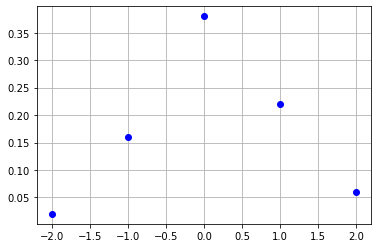

In [41]:
plt.plot(list(pwrdstr[0]),list(pwrdstr[1]), 'bo')
plt.grid(True)
plt.show()

# Plotting $\frac{I'}{I_0}(P)$

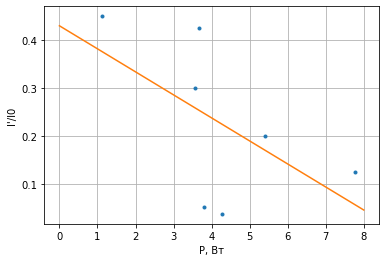

In [43]:
pltdata = np.array([data['Unnamed: 4'][33:40],data['Unnamed: 5'][33:40]])
x = list(pltdata[0])
y = list(pltdata[1])
fit = np.polyfit(x, y, 1)
fitfunc = np.poly1d(fit)
plt.subplot(1,1,1)
plt.plot(x, y, '.')
plt.grid(True)
xp = np.linspace(0,8,100)
plt.plot(xp, fitfunc(xp), '-')
plt.xlabel("P, Вт")
plt.ylabel("I'/I0")
plt.show()